# Multivariate analysis
If you read this good luck! You can do this. If the exam went horrible we can drink beer/wine after :D.

    

# Methods used in this course
Here are the methods that are used and a small introduction when they are used. the following chapters we go through each method and explain what it is when it is used and how to use it.
- single dataset as 1 group:
    - Principle component analysis(PCA)
    - Factor analysis
    - MDS
    - SGP
- single dataset with n groups:
    - Linear discriminant analysis
- 2 sets of data:
    - regression:
        - MultiLinear Regression (MLR)
        - Principle Component Regression(PCA + MLR)
        - Least Square Regression(LSR)

## Principle component analysis (PCA)
### What is it?
A technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretabillity of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. it is a method that describes the internal structure of a set of observations, with measurements in multiple variables. The observations in the dataset are the columns and the variables are the rows in the dataset. these variables are not wholly independent, and each pair of variables has a characteristic covariance and correlation.
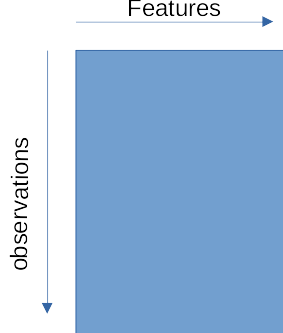




### When to use it?

### How to use it?
- __step1__: Standardization
    - The aim of this step is to standardize teh range of the continuous intitial variables so that each one of them contributes equally to the analysis
    - the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variance of the initial variables. that is, if there are large difference between the ranges of initial variables, those variables with larger ranges will dominates over those with small ranges(for example a variable that ranges between 0 and 100 will dominates over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparables scales can prevent this problem
    - Mathematically, this can be done by substracting the mean and dividing by the standard deviation for each value of each variable
    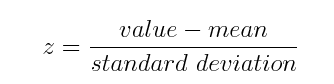
<br> 
<br>
- __step2__: Covariance matrix computation
    
    - The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So in order to identify these correlation we compute the __covariance matrix__.
    
    - The covariance matrix is a p x p symmetric matrix(where p is the number of dimensions) that has as entries the covariance associated with all possible pairs of the initial variables.
    
    - for example, for a 3-dimensional dataset with 3 variables x,y,z the covariance matrix is a 3x3 matrix of the form below.
    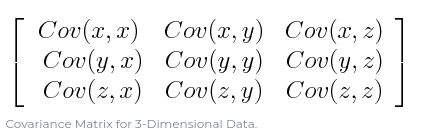
    
    - Since the covariance of a variable with itself is its variance (Cov(a,a) = Var(a)), in the main diagonal(Top left to bottom right) we actually have the variance of the initial variable. And since the covariance is commutative (Cov(a,b) = Cov(b,a)), the entries of the covariance matrix are symmetric with repsect to the main diagonal, which means that the upper and the lower triangular portions are equal
    
    - __what do the covariances that we have as entries of the matrix tell us about the correlations between the variables?__
        - It's actually the sign of the covariance that matters
        - if positive then: the two variables increase or decrease together(correlated) if negative then: one increase when the other decreases (Inversely correlated)
<br>
<br>

- __step3__: Compute the __eigenvectors__ and __eigenvalues__ of the covariance matrix to identify the principal components
    - We need the eigenvectors and eigenvalues to compute from the covariance matrix in order to determine the __principal components__ of the data.
    
    - Principle components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables(i.e., principal components) are uncorrelated and most of the information within the initial variable is sqeezed or compressed into the first components. The idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.
    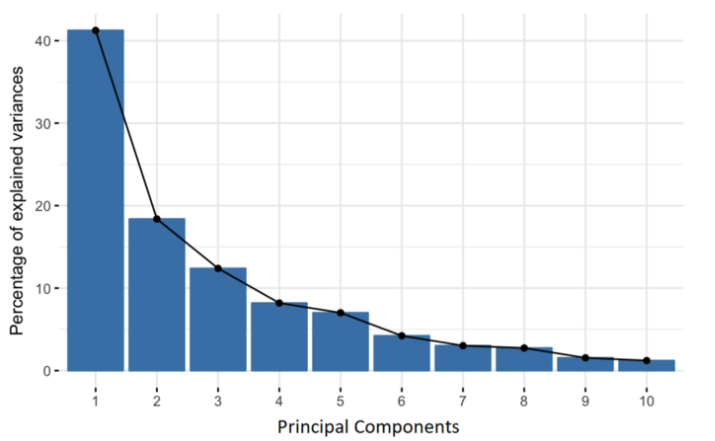
    
    - Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.
    
    - __Note__ it is important to realize here that the principal components have no real meaning since they are constructed as linear combinations of the initial variables.
    
    - Geometrically speaking, principal components represent the directions of the data that explain a __maximal amount of variance__, thtat is to say, the lines that capture most information of the data. the relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger dispersion along a line, the more infomration it has. Just thing of principal components as new axes that provide the best angle to see and evaluate the data so that the differences between observations are better visisble.
<br><br>
- __How PCA constructs the principal components__
    - there are as many principal components as there are varaibles in the dataset, principal components are constructed so that the first principal component accounts fo the __largest possible variance__ in the dataset. For example, lets assume that the scatter plot of out data set is as shown below. we can guess the first principal component by matching the line with the purple marks because it goes through the origin and it's the line which the projection of the red dots is the most spread out. _mathmatically speaking_, it's the line that maximizes the variance(the average of the squared distances from the projects red dots to the origin).
    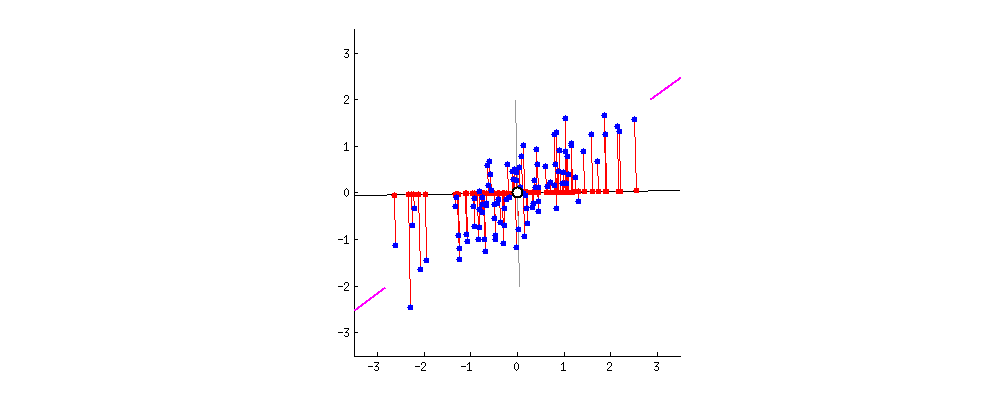
    - The second principal component is calculated in the same way, with the condition that it is uncorrelated with the first principal component and that it accounts for the next highest variance. this continues until a total of p principal components have been calculated, equal to the original number of variable
    - Every egenvector has an eigenvalue. their number is equal to the number if dimensions of the data. for example a 3-dimensional dataset has 3 variables and therefore there are 3 eigenvectors with 3 corresponding eigenvalues.
    - The eigenvectors of the covariance matrix are actually the _directions of the axes where there is the most variance_ (most information) and that we call __principle components__. eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of varaicen varried in each principal component.
    - By ranking your eigenvectors in order of their eigenvalues, you get the principal components in order of significance.
    - __example__: a dataset that has 2 dimensions with 2 variables x,y and that the eigenvectors and eigenvalues of the covariance matrix are as follows:
    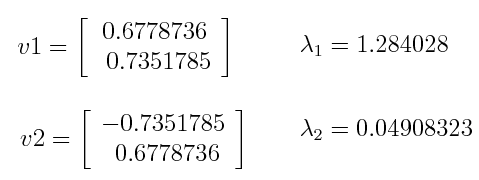
        - if we rank the eigenvalues in descending order we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component(PC1) is v1 and the one that corresponds to the second principle component (PC2) is v2.
        - we divide the eigenvalue of each component by the sum of eigenvalues. if we apply this to the example above we find that pc1 carries 96 percent of the variance data and pc2 4 percent of the variance of the data
<br><br>
- __step4__ Feature vector:
    - In this step, what we do is, to choose whether to keep all these components or discard those of lesser significance (of low eigenvalues), and form with the remaining ones a matrix of vectors that we call _feature vector_.
    - making a feature vector is the first tep towards dimensionality reduction, because if we choose to only p eigenvectors(components) out of n, the final dataset will have only p dimensions
    - __example__: 
        - from the previous example we can choose to form a feature vector with both of the eigenvectors v1 and v2
    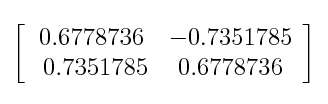
        - or discard the eigenvector v2, which is the one of lesser significance, and form a feature vector with only v1
        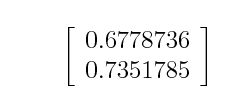
            - this will result in loss of information in the final data set. but given that v2 was carrying only 4 percent of the information, the loss will be therefor not important and we will still have 96 percent of the information that is carried by v1.
    - if you want to describe your data in terms of new variables(principal components) that are uncorrelated without seeking to reduce dimensionality, leaving out lesser significant components is not needed.
<br><br>
- __step5__ Recast the data along the pricipal components axes:
    - in this final step, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components. This can be done by multiplying the transpose of the original dataset by the transpose of the feature vector
    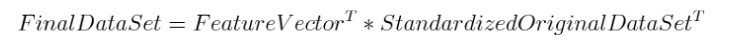

    